### Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### EDA

In [13]:
# Read data with excess columns dropping
excess_data = ["oaid_hash", "banner_id0", "banner_id1", "rate0", "rate1", "g0", "g1", "coeff_sum0", "coeff_sum1"]
data = pd.read_csv("./data/data.csv").drop(excess_data, axis=1)
data.head()

,date_time,zone_id,banner_id,campaign_clicks,os_id,country_id,impressions,clicks
0,2021-09-27 00:01:30.000000,0,0,0,0,0,1,1
1,2021-09-26 22:54:49.000000,1,1,0,0,1,1,1
2,2021-09-26 23:57:20.000000,2,2,3,0,0,1,1
3,2021-09-27 00:04:30.000000,3,3,0,1,1,1,1
4,2021-09-27 00:06:21.000000,4,4,0,1,0,1,1


Описание имеющихся наблюдений:

* __date_time__ - время показа рекламы  
* __zone_id__ - id зоны, где зона - место на сайте для размещения рекламы  
* __banner_id__ - id баннера, где баннер - сама реклама  
* __campaign_clicks__ - общее количество показов данной кампании (которой соотвествует баннер) данному юзеру, произошедшие до текущего показа. Кампанию стоит понимать как что-то общее (рекламодатель / тематика / и т. п.) для баннеров.  
* __os_id__ - id операционной системы  
* __country_id__ - id страны  
* __impressions__ - был ли показ  
* __clicks__ - был ли клик  

In [20]:
data.zone_id.dtype

dtype('int64')

In [35]:
def analysis(data: pd.DataFrame):
    # 1. Get count of records and columns
    n_records, n_columns = data.shape
    print(f"Count of records: {n_records}")
    
    # 2. Check null values
    null_columns=data.columns[data.isnull().any()]
    if len(null_columns) == 0:
        print("Dataframe does not consists null values")
    else:
        print("Number of null rows in columns")
        print(data[null_columns].isnull().sum())
    
    # 3. Datetime overview: recording time interval and count of records per day
    data["date_time"] = pd.to_datetime(data["date_time"])
    print(f"\nRecords were made in interval from {data['date_time'].min()} to {data['date_time'].max()}")
    
    data_date = data["date_time"].dt.date
    print(f"Days count: {data_date.nunique()}\n{data_date.value_counts()}")
    
    
    # 4. Base overview for other columns: count of unique values and its distribution 
    print("\nColumns overview\n")
    for col in data.columns[1:-1]:
        print(f"'{col}' values distribution")
        data[col].hist()
        plt.show()
        print(f"Count of unique values: {data[col].nunique()}")
        print(f"Values format: {data[col].dtype}\n")

Count of records: 15821472
Dataframe does not consists null values

Records were made in interval from 2021-09-01 00:02:49 to 2021-10-02 23:59:59
Days count: 8
2021-09-26    3102610
2021-09-29    2420588
2021-09-27    2367303
2021-09-28    2307355
2021-10-02    2128978
2021-09-30    1851189
2021-10-01    1643448
2021-09-01          1
Name: date_time, dtype: int64

Columns overview

'zone_id' values distribution


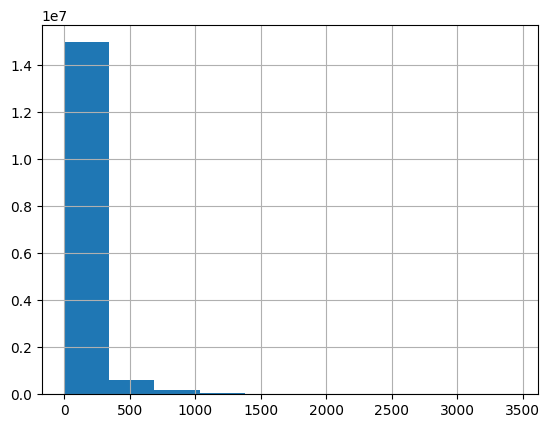

Count of unique values: 3444
Values format: int64

'banner_id' values distribution


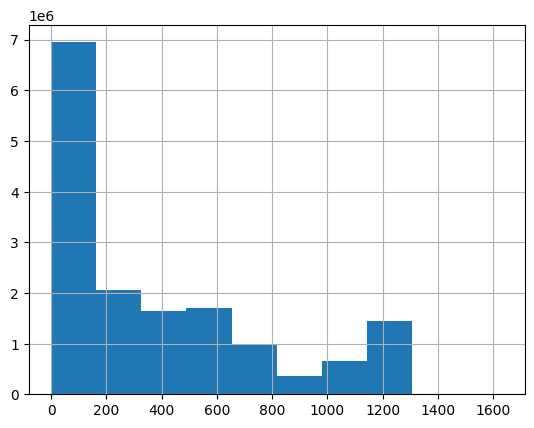

Count of unique values: 1633
Values format: int64

'campaign_clicks' values distribution


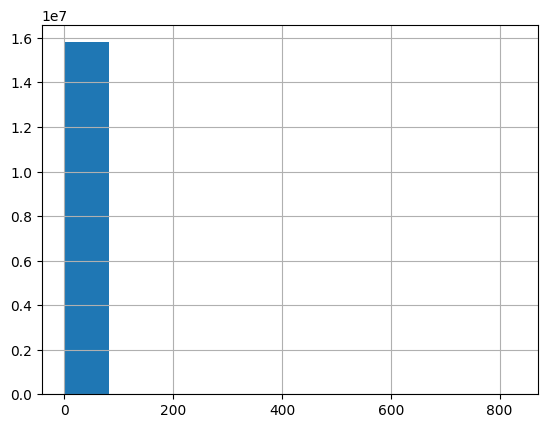

Count of unique values: 822
Values format: int64

'os_id' values distribution


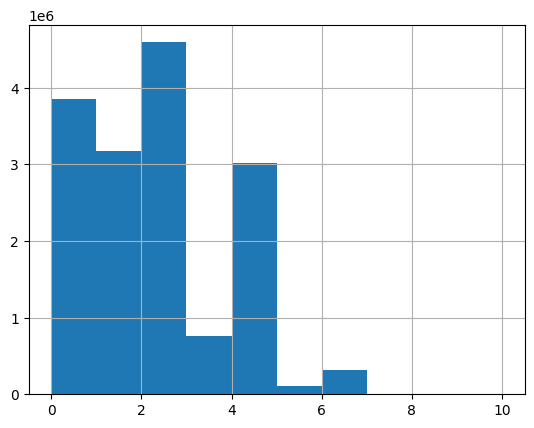

Count of unique values: 11
Values format: int64

'country_id' values distribution


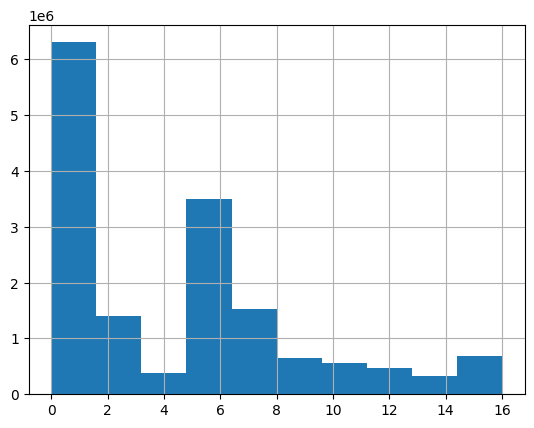

Count of unique values: 17
Values format: int64

'impressions' values distribution


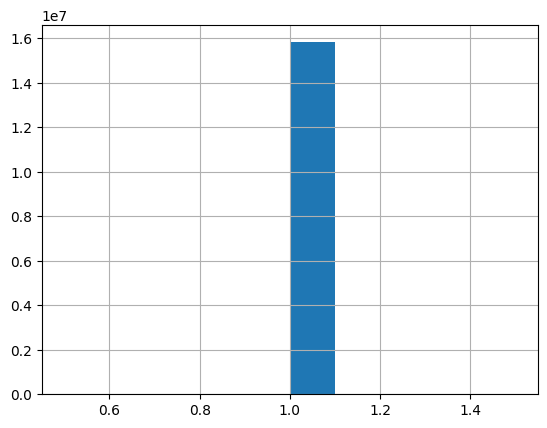

Count of unique values: 1
Values format: int64

'clicks' values distribution


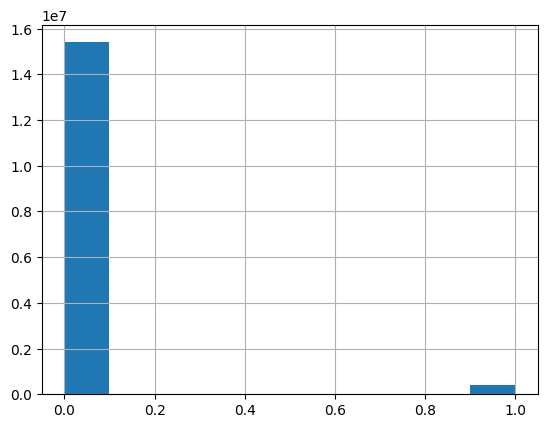

Count of unique values: 2
Values format: int64

'date' values distribution


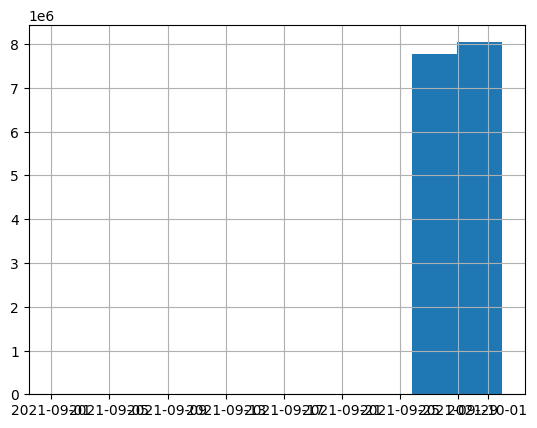

Count of unique values: 8
Values format: object



In [36]:
analysis(data)

Некоторые выводы по просмотренным данным:  
- Проблелы в данных отсутствуют  
- В данных присутствуют записи с 26-го сентября 2021 года по 2 октября 2021 года включительно *(и одна запись за 1-ое сентября 2021)*
- Столбец __impressions__ содержит в себе только единицы, поэтому её можно вынести за скобки прирассмотрении  
- Столбец __campaign_clicks__ содержит в себе очень много маленьких значений, поэтому, возможно, имеет смысл прологорифмировать шкалу

### Feature Engineering

In [46]:
# In Progress...
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    pass

### Model

In [47]:
# In Progress...
def create_model(data: pd.DataFrame):
    pass

### Evaluation

In [48]:
# In Progress...
def cv(data: pd.DataFrame):
    pass